<a href="https://colab.research.google.com/github/nadivaagista07/Scientific-Computing/blob/main/SC_AOL_Nadiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quadratic Regression (y = a*t² + b*t + c):
a = 0.706, b = -1.680, c = 2349.630
Quadratic R²: 0.993

Cubic Regression (y = a*t³ + b*t² + c*t + d):
a = 0.004, b = -0.134, c = 47.224, d = 1748.507
Cubic R²: 0.996


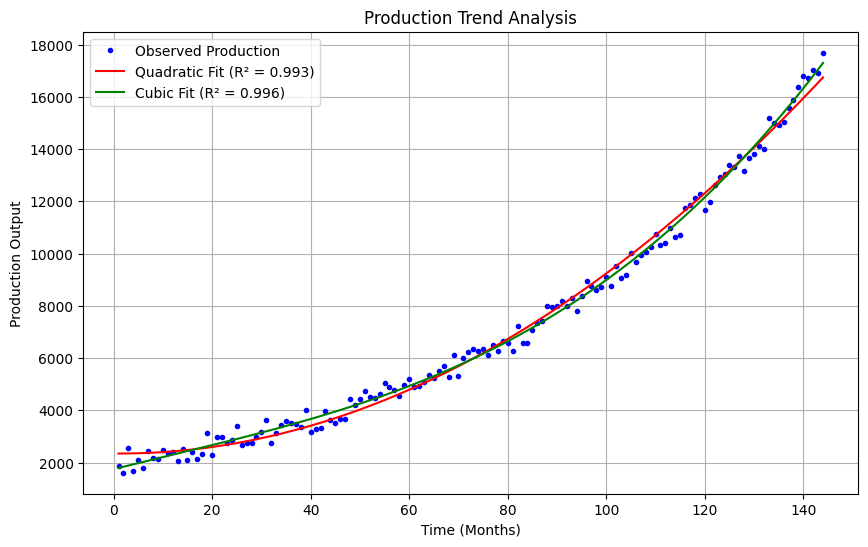

In [11]:
import numpy as np
import matplotlib.pyplot as plt

production_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086,
    2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161,
    3623, 2768, 3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502,
    3688, 3657, 4422, 4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345,
    6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012,
    8195, 8008, 8313, 7791, 8368, 8933, 8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012,
    9685, 9966, 10048, 10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808, 14101,
    13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388, 16782, 16716, 17033, 16896, 17689
]

months = np.arange(1, len(production_data) + 1)
actual_values = np.array(production_data)

quadratic_parameters = np.polyfit(months, actual_values, 2)
cubic_parameters = np.polyfit(months, actual_values, 3)

quadratic_model = np.poly1d(quadratic_parameters)
cubic_model = np.poly1d(cubic_parameters)

mean_actual = np.mean(actual_values)
total_ss = np.sum((actual_values - mean_actual) ** 2)


residual_ss_quad = np.sum((actual_values - quadratic_model(months)) ** 2)
residual_ss_cubic = np.sum((actual_values - cubic_model(months)) ** 2)


r2_quadratic = 1 - residual_ss_quad / total_ss
r2_cubic = 1 - residual_ss_cubic / total_ss


quadratic_parameters = [round(param, 3) for param in quadratic_parameters]
cubic_parameters = [round(param, 3) for param in cubic_parameters]


print("Quadratic Regression (y = a*t² + b*t + c):")
print(f"a = {quadratic_parameters[0]:.3f}, b = {quadratic_parameters[1]:.3f}, c = {quadratic_parameters[2]:.3f}")
print(f"Quadratic R²: {r2_quadratic:.3f}\n")

print("Cubic Regression (y = a*t³ + b*t² + c*t + d):")
print(f"a = {cubic_parameters[0]:.3f}, b = {cubic_parameters[1]:.3f}, c = {cubic_parameters[2]:.3f}, d = {cubic_parameters[3]:.3f}")
print(f"Cubic R²: {r2_cubic:.3f}")


plt.figure(figsize=(10, 6))
plt.plot(months, actual_values, 'b.', label='Observed Production')
plt.plot(months, quadratic_model(months), 'r-', label=f'Quadratic Fit (R² = {r2_quadratic:.3f})')
plt.plot(months, cubic_model(months), 'g-', label=f'Cubic Fit (R² = {r2_cubic:.3f})')
plt.xlabel('Time (Months)')
plt.ylabel('Production Output')
plt.title('Production Trend Analysis')
plt.legend()
plt.grid(True)
plt.show()


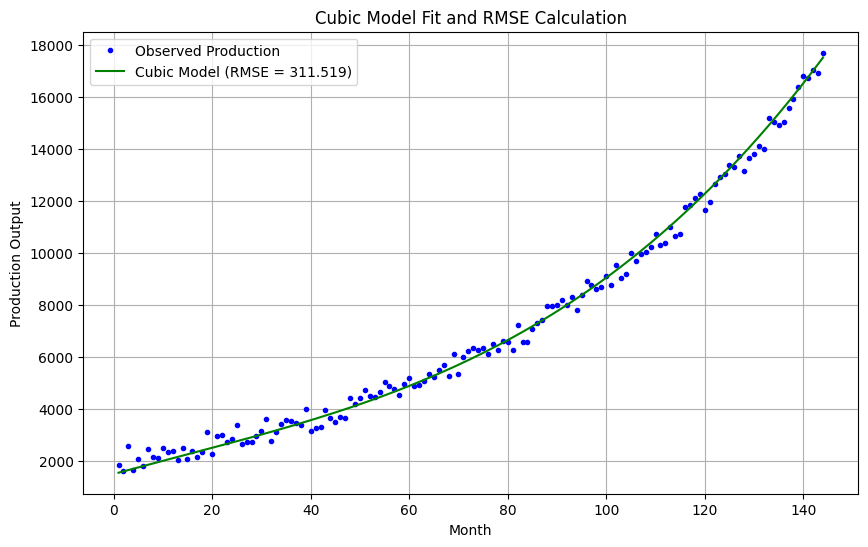

First 5 predicted values: [1561.739 1613.172 1664.323 1715.216 1765.875]
Last 5 predicted values: [16518.    16760.419 17005.892 17254.443 17506.096]
RMSE: 311.519


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

monthly_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

month_index = np.arange(1, 145)
actual_production = np.array(monthly_data)

# Model cubic numerik yang telah ditentukan
cubic_parameters = [0.004, -0.165, 51.900, 1510.000]
cubic_equation = np.poly1d(cubic_parameters)

# Hitung prediksi model
predictions = cubic_equation(month_index)
predictions = np.round(predictions, 3)

# Menghitung RMSE
rmse_value = np.sqrt(np.mean((actual_production - predictions) ** 2))
rmse_value = round(rmse_value, 3)

# Visualisasi data aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(month_index, actual_production, 'b.', label='Observed Production')
plt.plot(month_index, predictions, 'g-', label=f'Cubic Model (RMSE = {rmse_value:.3f})')
plt.xlabel('Month')
plt.ylabel('Production Output')
plt.title('Cubic Model Fit and RMSE Calculation')
plt.legend()
plt.grid(True)
plt.show()

# Fungsi prediksi produksi
def estimate_production(t):
    return 0.004 * t**3 - 0.165 * t**2 + 51.900 * t + 1510.000

# Cetak beberapa hasil prediksi
print("First 5 predicted values:", predictions[:5])
print("Last 5 predicted values:", predictions[-5:])
print(f"RMSE: {rmse_value:.3f}")


Kapasitas gudang akan terlampaui pada bulan ke-169.366 (Januari 2032)
Proses pembangunan harus dimulai pada bulan ke-156.366 (Desember 2030)


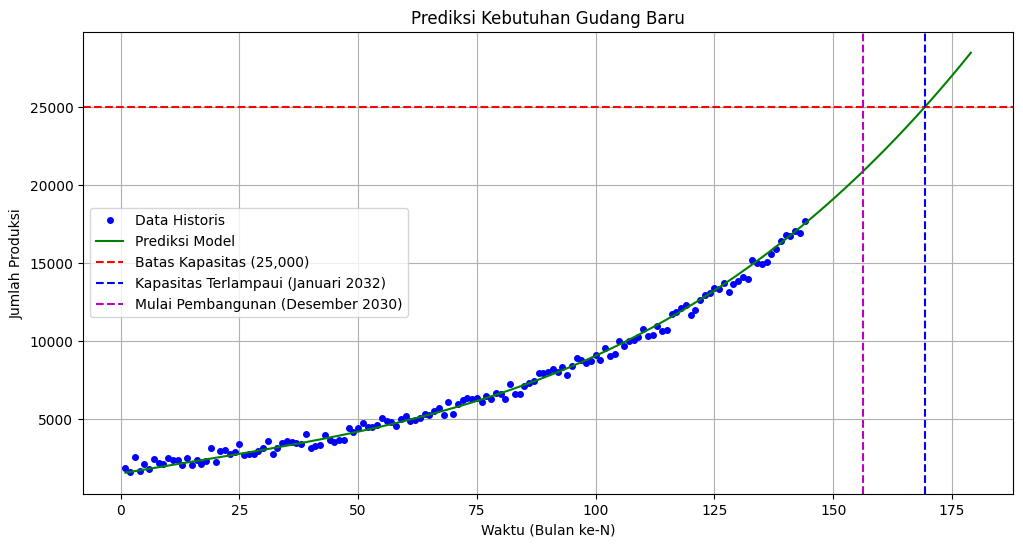

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

production_values = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

month_seq = np.arange(1, 145)
actual_values = np.array(production_values)


def cubic_model(t):
    return 0.004 * t**3 - 0.165 * t**2 + 51.900 * t + 1510.000

def capacity_function(t):
    return 0.004 * t**3 - 0.165 * t**2 + 51.900 * t - 23490.000  # 25000 - 1510

def capacity_derivative(t):
    return 0.012 * t**2 - 0.330 * t + 51.900

def find_exceed_time(initial_guess, tolerance=1e-6, max_iter=100):
    t_val = initial_guess
    for _ in range(max_iter):
        f_val = capacity_function(t_val)
        f_prime_val = capacity_derivative(t_val)
        if abs(f_prime_val) < 1e-10:
            break
        next_t = t_val - f_val / f_prime_val
        if abs(next_t - t_val) < tolerance:
            return round(next_t, 3)
        t_val = next_t
    return round(t_val, 3)

capacity_limit_month = find_exceed_time(165)
start_construction_month = capacity_limit_month - 13

def format_date(t):
    total_month = int(t) - 1
    year = 2018 + total_month // 12
    month = (total_month % 12) + 1
    months_name = [
        "Januari", "Februari", "Maret", "April", "Mei", "Juni",
        "Juli", "Agustus", "September", "Oktober", "November", "Desember"
    ]
    return f"{months_name[month-1]} {year}"

exceed_date = format_date(capacity_limit_month)
construction_date = format_date(start_construction_month)

print(f"Kapasitas gudang akan terlampaui pada bulan ke-{capacity_limit_month:.3f} ({exceed_date})")
print(f"Proses pembangunan harus dimulai pada bulan ke-{start_construction_month:.3f} ({construction_date})")

future_months = np.arange(1, 180, 1)
predicted_output = cubic_model(future_months)

plt.figure(figsize=(12, 6))
plt.plot(month_seq, actual_values, 'b.', label='Data Historis', markersize=8)
plt.plot(future_months, predicted_output, 'g-', label='Prediksi Model')
plt.axhline(y=25000, color='r', linestyle='--', label='Batas Kapasitas (25,000)')
plt.axvline(x=capacity_limit_month, color='b', linestyle='--', label=f'Kapasitas Terlampaui ({exceed_date})')
plt.axvline(x=start_construction_month, color='m', linestyle='--', label=f'Mulai Pembangunan ({construction_date})')
plt.xlabel('Waktu (Bulan ke-N)')
plt.ylabel('Jumlah Produksi')
plt.title('Prediksi Kebutuhan Gudang Baru')
plt.legend()
plt.grid(True)
plt.show()
